In [ ]:
import pandas as pd
import numpy as np
import math
from IPython.display import Markdown, display

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/IFSP/6º Semestre/Análise de Dados/Database"
dados = pd.read_csv(path + '/age_dataset.csv', sep=',')
dados

Mounted at /content/drive


,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...
1223004,Q77247326,Marie-Fortunée Besson,Frans model (1907-1996),NaN,France,Tailor; model,1907,1996.0,NaN,89.0
1223005,Q77249504,Ron Thorsen,xugador de baloncestu canadianu (1948–2004),NaN,Canada; United States of America,Athlete,1948,2004.0,NaN,56.0
1223006,Q77249818,Diether Todenhagen,German navy officer and world war II U-boat co...,NaN,Germany,Military personnel,1920,1944.0,NaN,24.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


In [ ]:
df_selection = dados[['Name', 'Short description', 'Gender', 'Country', 'Occupation', 'Birth year', 'Death year', 'Manner of death', 'Age of death']]

df_selection.head(10)

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
5,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0
6,Paul Morand,French writer,Male,France,Artist,1888,1976.0,NaN,88.0
7,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926.0,natural causes,86.0
8,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0


In [ ]:
nulos = df_selection.isnull().sum()

percentual_nulos = (nulos / len(df_selection)) * 100

tabela_nulos = pd.DataFrame({
    "Total de Valores Nulos": nulos,
    "Percentual de Nulos (%)": percentual_nulos
})

tabela_nulos

,Total de Valores Nulos,Percentual de Nulos (%)
Name,0,0.000000
Short description,67900,5.551881
Gender,133646,10.927638
Country,335509,27.433077
Occupation,206914,16.918436
Birth year,0,0.000000
Death year,1,0.000082
Manner of death,1169406,95.617121
Age of death,1,0.000082


In [ ]:
locales = df_selection['Country'].unique()
occupation = df_selection['Occupation'].unique()
death_types = df_selection['Manner of death'].unique()

print(f"Países: {len(locales)}")
print(f"Ocupações: {len(occupation)}")
print(f"Tipos de morte: {len(death_types)}")

Países: 5962
Ocupações: 9314
Tipos de morte: 207


In [ ]:
incongruity_len = len(
    df_selection[
        (df_selection['Manner of death'] == 'capital punishment; suicide') |
        (df_selection['Manner of death'] == 'homicide; natural causes') |
        (df_selection['Manner of death'] == 'capital punishment; homicide') |
        (df_selection['Manner of death'] == 'suicide; natural causes')
      ]
    )

death_types_undefined_len = df_selection['Manner of death'].isna().sum()

print(f"Incongruências: {incongruity_len}")
print(f"Não definido: {death_types_undefined_len}")

Incongruências: 92
Não definido: 1169406


In [ ]:
print(f'Antes de limpar: {df_selection.shape}')

df = df_selection[~(df_selection['Gender'] == 'Female; Male')]

Antes de limpar: (1223009, 9)


In [ ]:
bank_professions = [ "Banker" ]
bank = df[df['Occupation'].isin(bank_professions)]

bank['Occupation'].value_counts()

,count
Occupation,
Banker,822


In [ ]:
frequence_bank_gender = pd.crosstab(bank['Occupation'], bank['Gender'])
frequence_bank_gender

Gender,Female,Male
Occupation,,
Banker,16,806


In [ ]:
bank.head(10)

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
1224,Joachim Heinrich Wilhelm Wagener,German banker and patron of the arts,Male,Germany,Banker,1782,1861.0,NaN,79.0
6162,Carl Mayer von Rothschild,German-Italian banker,Male,Germany,Banker,1788,1855.0,NaN,67.0
6276,Amschel Mayer Rothschild,German banker,Male,Germany,Banker,1773,1855.0,NaN,82.0
6690,Gerson von Bleichröder,German banker,Male,Germany,Banker,1822,1893.0,NaN,71.0
7364,Prince Wolfgang of Hesse,(1896-1989),Male,Germany,Banker,1896,1989.0,NaN,93.0
7826,Anton Fugger,German merchant (1493-1560),Male,Germany,Banker,1493,1560.0,NaN,67.0
8471,Abraham Mendelssohn Bartholdy,German banker; father of Felix and Fanny Mende...,Male,Germany,Banker,1776,1835.0,NaN,59.0
9590,Daniel Itzig,German banker (1723-1799),Male,Germany,Banker,1723,1799.0,NaN,76.0
10788,Bartholomeus V. Welser,German banker,Male,Germany,Banker,1484,1561.0,NaN,77.0
14207,Johann Hinrich Gossler,German banker,Male,Germany,Banker,1738,1790.0,NaN,52.0


## Quantidades de nulos na seleção de bancários

In [ ]:
nulos_bank = bank.isnull().sum()

percentual_nulos_bank = (nulos_bank / len(bank)) * 100

tabela_nulos_bank = pd.DataFrame({
    "Total de Valores Nulos": nulos_bank,
    "Percentual de Nulos (%)": percentual_nulos
})

tabela_nulos_bank

,Total de Valores Nulos,Percentual de Nulos (%)
Name,0,0.000000
Short description,6,5.551881
Gender,0,10.927638
Country,227,27.433077
Occupation,0,16.918436
Birth year,0,0.000000
Death year,0,0.000082
Manner of death,782,95.617121
Age of death,0,0.000082


##Calculando as classes de Idade:

In [ ]:
def numberOfClasses(df):
    n = df.shape[0]
    k = 1 + 3.322 * math.log10(n)
    print(f"Número de classes (k): {k:.2f}")
    return int(k)

def calcular_classes(df, k:int, column:str, frequency_name:str, labels):
    # Obtendo os valores mínimo e máximo da coluna 'renda'
    min_val = df[column].min()
    max_val = df[column].max()

    # Garantindo que k seja um inteiro
    k = int(k)

    # Calculando a amplitude total
    amplitude_total = max_val - min_val

    # Calculando a amplitude de cada classe
    amplitude_classe = amplitude_total / k

    classes_inferiores = []
    classes_superiores = []

    for i in range(k):
        limite_inferior = min_val + i * amplitude_classe
        limite_superior = min_val + (i + 1) * amplitude_classe

        # Ajustando a última classe para garantir que inclua o valor máximo
        if i == k - 1:
            limite_superior = max_val

        classes_inferiores.append(limite_inferior)
        classes_superiores.append(limite_superior)

    print("Limites Inferiores das Classes:", classes_inferiores)
    print("Limites Superiores das Classes:", classes_superiores)

    # Adiciona max_val para incluir o último intervalo
    bins = classes_inferiores + [max_val]
    limit = bins

    # Criando uma nova coluna com as classes
    df[frequency_name] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)

    # Exibindo o DataFrame com as classes
    #print(df[[column, frequency_name]])

    return [df, bins]  # Retornando o DataFrame atualizado



In [ ]:
k = numberOfClasses(bank)

labels = ['Early', 'Normal', 'Long Old']

result = calcular_classes(bank, 3, 'Age of death', 'Age of death Class', labels=labels)



Número de classes (k): 10.68
Limites Inferiores das Classes: [17.0, 44.33333333333333, 71.66666666666666]
Limites Superiores das Classes: [44.33333333333333, 71.66666666666666, 99.0]


<ipython-input-12-497fb65d3980>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[frequency_name] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)


| Classe    | Limite Inferior | Limite Superior |
|-----------|------------------|-----------------|
| Early     | 16.0             | 43.67           |
| Normal    | 43.67            | 71.33           |
| Long Old  | 71.33            | 99.0            |


In [ ]:
pd.value_counts(bank['Age of death Class'])


<ipython-input-14-1808a6daba9a>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(bank['Age of death Class'])


,count
Age of death Class,
Long Old,510
Normal,297
Early,15


In [ ]:
frequence_bank = pd.crosstab(index=[bank['Occupation'], bank['Gender']],
                                columns=bank['Age of death Class'])

# Display the cross-tabulation
print(frequence_bank)

Age of death Class  Early  Normal  Long Old
Occupation Gender                          
Banker     Female       2       4        10
           Male        13     293       500


In [ ]:
# Calculando as porcentagens
total_counts = frequence_bank.sum(axis=1)

frequence_percentage = frequence_bank.div(total_counts, axis=0) * 100

print("Frequência:")
print(frequence_bank)
print("\nPorcentagens:")
print(frequence_percentage)

Frequência:
Age of death Class  Early  Normal  Long Old
Occupation Gender                          
Banker     Female       2       4        10
           Male        13     293       500

Porcentagens:
Age of death Class      Early     Normal   Long Old
Occupation Gender                                  
Banker     Female   12.500000  25.000000  62.500000
           Male      1.612903  36.352357  62.034739


In [ ]:
# Contagem total de registros
total_count = len(bank)

# Contagem de cada gênero
gender_count = bank['Gender'].value_counts()

# Exibição dos resultados
print(f"Quantidade Total de Registros: {total_count}")
print(f"Quantidade de Masculino: {gender_count.get('Male', 0)}")
print(f"Quantidade de Feminino: {gender_count.get('Female', 0)}")

Quantidade Total de Registros: 822
Quantidade de Masculino: 806
Quantidade de Feminino: 16


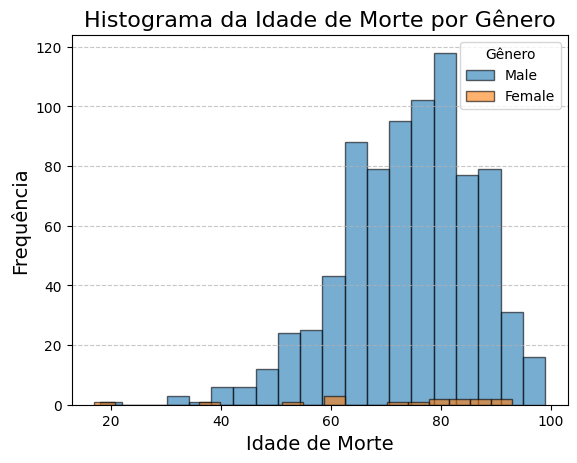

<ipython-input-17-4a50bba801af>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bank['Gender'], y=bank['Age of death'], palette="Set2")


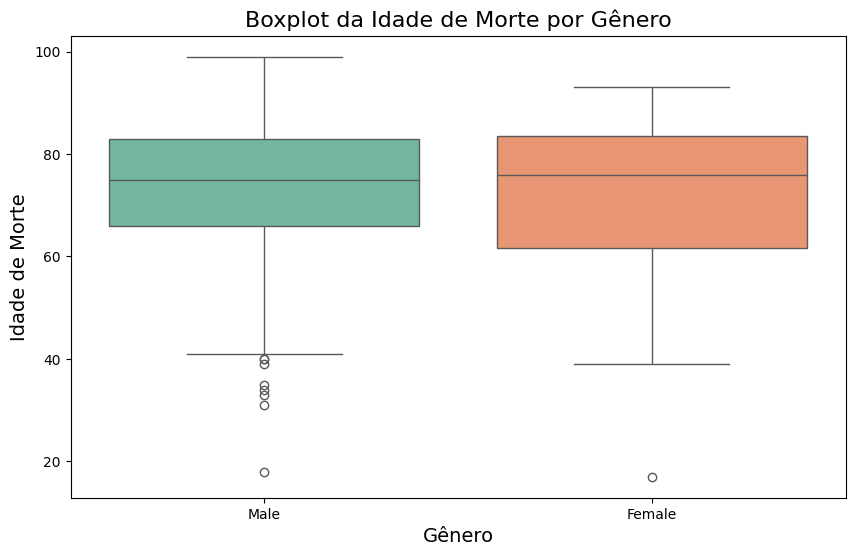

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Análise Estatística Descritiva

bank_death_year = bank['Age of death']
death_frequency = bank_death_year.value_counts().sort_index()

# Histograma para idade de morte
for gender in bank['Gender'].unique():
    gender_data = bank[bank['Gender'] == gender]['Age of death']
    plt.hist(gender_data, bins=20, alpha=0.6, label=gender, edgecolor='black')

plt.title("Histograma da Idade de Morte por Gênero", fontsize=16)
plt.xlabel("Idade de Morte", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.legend(title="Gênero")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot para idade de morte por gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x=bank['Gender'], y=bank['Age of death'], palette="Set2")
plt.title("Boxplot da Idade de Morte por Gênero", fontsize=16)
plt.xlabel("Gênero", fontsize=14)
plt.ylabel("Idade de Morte", fontsize=14)
plt.show()


In [ ]:
# Cálculo das medidas de centralidade
mean_age = bank['Age of death'].mean()
mode_age = bank['Age of death'].mode()[0]
median_age = bank['Age of death'].median()

print(f"Média da Idade de Morte: {mean_age:.1f}")
print(f"Moda da Idade de Morte: {mode_age}")
print(f"Mediana da Idade de Morte: {median_age}")

# Masculino
male_data = bank[bank['Gender'] == 'Male']['Age of death']
mean_male = male_data.mean()
mode_male = male_data.mode()[0] if not male_data.mode().empty else None
median_male = male_data.median()

print("\n-----------------\nMasculino")
print(f"Média da Idade de Morte: {mean_male:.1f}")
print(f"Moda da Idade de Morte: {mode_male}")
print(f"Mediana da Idade de Morte: {median_male}")

# Feminino
female_data = bank[bank['Gender'] == 'Female']['Age of death']
mean_female = female_data.mean()
mode_female = female_data.mode()[0] if not female_data.mode().empty else None
median_female = female_data.median()

print("\n-----------------\nFeminino")
print(f"Média da Idade de Morte: {mean_female:.1f}")
print(f"Moda da Idade de Morte: {mode_female}")
print(f"Mediana da Idade de Morte: {median_female}")

Média da Idade de Morte: 74.0
Moda da Idade de Morte: 82.0
Mediana da Idade de Morte: 75.0

-----------------
Masculino
Média da Idade de Morte: 74.1
Moda da Idade de Morte: 82.0
Mediana da Idade de Morte: 75.0

-----------------
Feminino
Média da Idade de Morte: 70.1
Moda da Idade de Morte: 62.0
Mediana da Idade de Morte: 76.0
Name                  822
Short description     816
Gender                822
Country               595
Occupation            822
Birth year            822
Death year            822
Manner of death        40
Age of death          822
Age of death Class    822
dtype: int64


In [ ]:
# Cálculo do Desvio Padrão para Idade de Morte
std_age = bank['Age of death'].std()

# Cálculo da Amplitude Interquartil (IQR) para Idade de Morte
Q1 = bank['Age of death'].quantile(0.25)
Q3 = bank['Age of death'].quantile(0.75)
IQR_age = Q3 - Q1

# Exibição dos resultados
print(f"Desvio Padrão da Idade de Morte: {std_age:.2f}")
print(f"Amplitude Interquartil (IQR) da Idade de Morte: {IQR_age:.2f}")

# Filtrando os dados por gênero
male_death_age = bank[bank['Gender'] == 'Male']['Age of death']
female_death_age = bank[bank['Gender'] == 'Female']['Age of death']

# Cálculo do Desvio Padrão para Idade de Morte (Masculino)
std_male_age = male_death_age.std()

# Cálculo do Desvio Padrão para Idade de Morte (Feminino)
std_female_age = female_death_age.std()

# Cálculo da Amplitude Interquartil (IQR) para Idade de Morte (Masculino)
Q1_male = male_death_age.quantile(0.25)
Q3_male = male_death_age.quantile(0.75)
IQR_male = Q3_male - Q1_male

# Cálculo da Amplitude Interquartil (IQR) para Idade de Morte (Feminino)
Q1_female = female_death_age.quantile(0.25)
Q3_female = female_death_age.quantile(0.75)
IQR_female = Q3_female - Q1_female

# Exibição dos resultados
print(f"Desvio Padrão da Idade de Morte (Masculino): {std_male_age:.2f}")
print(f"Amplitude Interquartil (IQR) da Idade de Morte (Masculino): {IQR_male:.2f}\n")
print(f"Desvio Padrão da Idade de Morte (Feminino): {std_female_age:.2f}")
print(f"Amplitude Interquartil (IQR) da Idade de Morte (Feminino): {IQR_female:.2f}\n")


Desvio Padrão da Idade de Morte: 12.26
Amplitude Interquartil (IQR) da Idade de Morte: 17.00

Desvio Padrão da Idade de Morte (Masculino): 12.04
Amplitude Interquartil (IQR) da Idade de Morte (Masculino): 17.00

Desvio Padrão da Idade de Morte (Feminino): 20.65
Amplitude Interquartil (IQR) da Idade de Morte (Feminino): 21.75



In [ ]:
from tabulate import tabulate

# Criando a tabela comparativa com as estatísticas calculadas
data = {
    'Estatísticas': ['Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Amplitude Interquartil (IQR)'],
    'Masculino': [mean_male, median_male, mode_male, std_male_age, IQR_male],
    'Feminino': [mean_female, median_female, mode_female, std_female_age, IQR_female],
}

# Criando o DataFrame
stats_comparison = pd.DataFrame(data)

# Exibindo a tabela estilizada
print(tabulate(stats_comparison, headers='keys', tablefmt='fancy_grid', showindex=False))


╒══════════════════════════════╤═════════════╤════════════╕
│ Estatísticas                 │   Masculino │   Feminino │
╞══════════════════════════════╪═════════════╪════════════╡
│ Média                        │     74.1141 │    70.0625 │
├──────────────────────────────┼─────────────┼────────────┤
│ Mediana                      │     75      │    76      │
├──────────────────────────────┼─────────────┼────────────┤
│ Moda                         │     82      │    62      │
├──────────────────────────────┼─────────────┼────────────┤
│ Desvio Padrão                │     12.0432 │    20.6542 │
├──────────────────────────────┼─────────────┼────────────┤
│ Amplitude Interquartil (IQR) │     17      │    21.75   │
╘══════════════════════════════╧═════════════╧════════════╛


In [ ]:
# Cálculo das medidas de variação
bank.describe()

,Birth year,Death year,Age of death
count,822.000000,822.000000,822.000000
mean,1831.754258,1905.789538,74.035280
std,104.030132,106.651119,12.260469
min,1201.000000,1273.000000,17.000000
25%,1802.000000,1875.000000,66.000000
50%,1852.000000,1926.000000,75.000000
75%,1896.000000,1972.000000,83.000000
max,2000.000000,2021.000000,99.000000
